# **CHAP4. 합성곱 신경망(CNN)**

## **1. 합성곱 신경망** 

* 데이터가 가진 특징들의 패턴을 학습하는 알고리즘으로 컴퓨터 비전 분야에서 많이 사용됨
* 이미지 분류, 객체 탐지, 스타일 전이 등

* 일반적으로 객체의 위치는 이미지의 좌표 값으로 나타내기 때문에 경계 박스를 찾는 문제는 회귀분석으로 해결함
* 클래스를 예측하는 문제는 분류
* 스타일 전이는 콘텐츠 이미지와 스타일 참조 이미지를 이용해 콘텐츠의 기본 형태를 유지하고 스타일을 입혀서 새로운 이미지를 생성하는 기술


### 1) 이미지 표현

* 흑백 이미지 : 화소를 나타내는 숫자는 이미지의 강도를 나타내고, 숫자가 클수록 더 강한 특성을 나타낸다고 이해할 수 있음
* 컬러 이미지 : RGB 채널로 구성된 3장의 이미지를 겹쳐서 표현
  * 각 채널 이미지는 채널이 1개인 흑백 이미지와 마찬가지로 0~255 사이의 숫자로 나타냄
  * 숫자가 클수록 해당 색을 더 강하게 표현함

### 2) 합성곱

*  입력 이미지에 대하여 일반적으로 정방형 크기를 가지는 커널을 사용하여, 입력 이미지에 대한 특성을 추출하는 방법
* 합성곱 연산을 통해서 추출된 이미지를 특성맵이라고 부름
* 입력 이미지의 좌측 상단부터 커널과 같은 크기를 갖도록 입력 이미지의 일부분에 커널이 겹치도록 투영
* 입력 이미지와 커널이 겹치는 부분에 대하여 합성곱 연산 수행
  * element-wise 곱셉 연산을 수행 후 모두 더한 값 (단일 스칼라 값)
  * 합성곱 결과인 단일 스칼라 값은 추출된 이미지인 feature map의 개별 값이 됨
* 커널이 3*3인 경우 총 9개의 가중치를 가지며 오차 역전파 시 커널의 가중치를 업데이트 해야 함
* 합성곱 신경망이 이미지 특성 추출에 효율적인 이유는 커널의 공유 가중치 때문. -> 오차 역전파 시 그래디언트를 계산할 때 9개에 대해서만 업데이트 하면 됨 -> fully connected layer를 사용할 때보다 연산량이 훨씬 적음 

### 3) 채널

* 입력 이미지를 구성하는 2차원 배열의 갯수
  * ex. 흑백 이미지는 단일 채널, RGB 이미지는 3개의 채널

* 입력 이미지가 여러 개의 채널을 갖는 경우
  * 우선 입력 이미지의 채널 갯수만큼 커널이 생성되고, 각 채널마다 하나씩 커널을 적용하여 합성곱 연산을 수행 -> 입력 이미지의 채널 개수만큼 합성곱 연산된 결과가 생성되고, element-wise 덧셈 연산으로 모두 더해주면 최종 특성맵이 생성됨

* 만약 합성곱 레이어에 출력 필터의 개수를 20개로 설정했다면 입력 이미지의 채널 개수 3개와 출력 필터의 갯수 20개가 곱해져서 총 60개의 커널이 생성됨 + 1개 커널의 사이즈가 3*3 + bias 20개 => 560개 그래디언트

### 4) 스트라이드
* 커널은 좌측 상단으로부터 입력 이미지를 기준으로 우측으로 이동하면서 합성곱 연산을 수행하여 특성맵에 결과를 채워나감.
* 스트라이드 : 커널이 이동하는 간격 (주로 1,2)
* 스트라이드 2배 > 특성맵 크기 1/2배

### 5) 패딩
* 추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 패딩 설정
* zero-padding : 입력 이미지의 가장자리에 패딩값 0으로 채움

### 6) 특성맵 사이즈
* 패딩과 스트라이드를 적용하고, 입력 데이터와 필터의 크기가 주어졌을 때 출력 데이터의 크기를 구하는 식
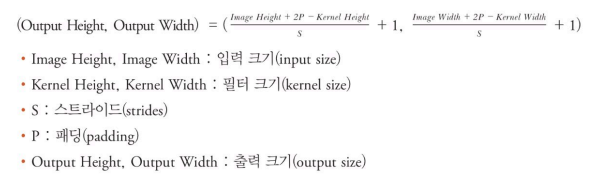

### 7) 풀링
* 풀링 레이어 : 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어
* 이미지 축소를 통해 연산량을 감소함
* 과대적합을 방지

* 최대풀링 : 특징의 값이 큰 값이 다른 특징들을 대표
* 평균 풀링 : 특징 값의 평균이 다른 특징들을 대표

* 풀링 레이어도 스트라이드 값을 가지며 스트라이드를 2로 설정하면 2칸씩 건너뛰면서 풀링을 수행

## **2.간단한 모델 생성**

* mnist 모델 사용

### 1) 데이터 로드 및 전처리

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


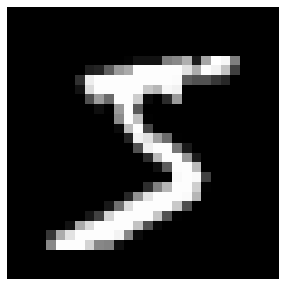

In [2]:
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx], cmap="gray")
    plt.axis("off")
    plt.show()

plot_image(x_train, 0)

In [3]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


* 딥러닝 모델의 안정적인 학습을 위해 입력 이미지 픽셀 값을 정규화 변환

In [4]:
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


* 색상을 나타내는 채널 추가

In [5]:
print(x_train.shape, x_valid.shape)
x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]
print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


### 2) Sequential API로 모델 생성 및 학습

* 합성곱 레이어 1개, 풀링 레이어 1개
* 최종 분류기로 Dense 레이어를 적용하기 위해 Flatten 레이어 추가
* 합성곱은 Conv2D 레이어 사용
* ReLU 활성화 함수 적용
* 풀링 레이어는 (2,2), MAX Pooling
* 최종 분류기 노드 10개
* 분류 클래스가 10개인 다중 분류 문제이므로 활성화 함수로 softmax 사용

* 모델 구조 정의

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', 
                           input_shape=(28, 28, 1), name='conv'),
    tf.keras.layers.MaxPooling2D((2, 2), name='pool'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
])
     

* 모델 컴파일

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)
     

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2110 - accuracy: 0.9403 - val_loss: 0.0855 - val_accuracy: 0.9748
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0768 - accuracy: 0.9777 - val_loss: 0.0636 - val_accuracy: 0.9795
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0584 - accuracy: 0.9825 - val_loss: 0.0574 - val_accuracy: 0.9817
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0477 - accuracy: 0.9862 - val_loss: 0.0541 - val_accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0408 - accuracy: 0.9877 - val_loss: 0.0556 - val_accuracy: 0.9820
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0347 - accuracy: 0.9897 - val_loss: 0.0648 - val_accuracy: 0.9808
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0294 - accuracy: 0.9917 - val_loss: 0.0514 -

* 모델 평가

In [8]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 1s 3ms/step - loss: 0.0600 - accuracy: 0.9836


[0.060015417635440826, 0.9836000204086304]

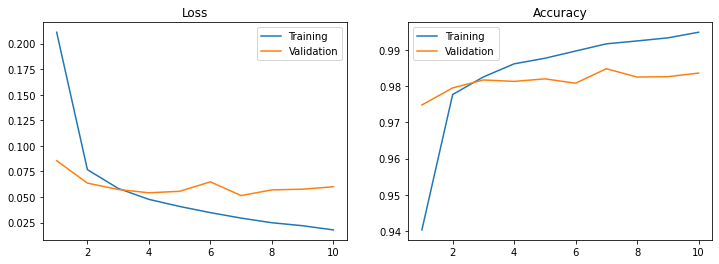

In [9]:
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 10)

> train set에 대한 손실은 계속 줄어드는데 test set의 손실은 일정 수준에서 더 낮아지지 않음. > 과대적합

### 3) 모델 구조 파악

* 모델 인스턴스에 summary() 메소드를 적용해주면 모델의 구조를 요약해서 보여줌
  * 각 레이어의 이름과 출력 텐서의 형태, 각 레이어를 구성하는 파라미터 개수를 알 수 있음

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


* 생성된 모델 인스턴스의 input 속성으로부터 입력 레이어의 텐서를 추출할 수 있음

In [11]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

> (None,28,28,1) : 가장 앞에 있는 축의 None = 배치가 들어오는 위치로서 배치 크기로 어떤 값이든 가능하다는 의미

* 모델의 출력 텐서는 output 속성으로 선택 가능

In [12]:
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

* 모델을 구성하는 레이어들을 추출하려면 layers 속성을 확인
  * 파이썬 리스트 형태로 레이어 객체를 담아서 보여줌

In [13]:
model.layers

In [14]:
model.layers[0]

* 각 레이어에 입력되는 텐서를 따로 선택하는 것도 가능
  * 앞의 Conv2D 레이어에는 모델의 입력 데이터가 그대로 들어가기 때문에 (None,28,28,1) 형태를 가짐

In [15]:
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

* 각 레이어에서 출력되는 텐서 확인 가능

In [16]:
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

* 각 레이어의 가중치 행렬 추출 가능
  * 첫번째 변수 행렬 : 커널 행렬의 가중치
  * 두번째 변수 행렬 : 각 커널의 상수항(bias)

In [17]:
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-0.52412724,  0.07122033, -0.81206024, -0.06242691,
            0.73081714, -1.0973238 ,  0.59569114, -0.41049206,
           -1.1088208 , -0.22437674,  0.04058431,  0.46686473,
            0.03856485,  0.31970006, -0.4183362 ,  0.24040106,
            0.16907153, -0.5316888 , -0.5821826 , -0.7727514 ,
           -0.2670907 ,  0.16785921, -0.5056249 , -0.9102103 ,
            0.11773077,  0.2906914 ,  0.58784676,  0.35827452,
           -0.14109617,  0.0172883 ,  0.32196265, -0.13026574]],
 
         [[ 0.02358943,  0.2851845 , -1.0502291 , -0.14945196,
           -0.8138176 , -0.04876051,  0.23594826, -0.21916161,
           -0.79696894,  0.24470167,  0.6106172 , -0.11208048,
            0.1110234 , -0.32882774, -0.32848004,  0.4769745 ,
            0.28735164, -0.5916998 , -0.7230689 , -0.07060434,
           -0.00461158,  0.26494598,  0.25454384, -0.3693792 ,
            0.501251  ,  0.2088876 ,  0.23

* 커널 행렬의 가중치 또는 상수항 따로 선택 가능

In [19]:
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-0.52412724,  0.07122033, -0.81206024, -0.06242691,
           0.73081714, -1.0973238 ,  0.59569114, -0.41049206,
          -1.1088208 , -0.22437674,  0.04058431,  0.46686473,
           0.03856485,  0.31970006, -0.4183362 ,  0.24040106,
           0.16907153, -0.5316888 , -0.5821826 , -0.7727514 ,
          -0.2670907 ,  0.16785921, -0.5056249 , -0.9102103 ,
           0.11773077,  0.2906914 ,  0.58784676,  0.35827452,
          -0.14109617,  0.0172883 ,  0.32196265, -0.13026574]],

        [[ 0.02358943,  0.2851845 , -1.0502291 , -0.14945196,
          -0.8138176 , -0.04876051,  0.23594826, -0.21916161,
          -0.79696894,  0.24470167,  0.6106172 , -0.11208048,
           0.1110234 , -0.32882774, -0.32848004,  0.4769745 ,
           0.28735164, -0.5916998 , -0.7230689 , -0.07060434,
          -0.00461158,  0.26494598,  0.25454384, -0.3693792 ,
           0.501251  ,  0.2088876 ,  0.2334435 ,  0.187245

In [20]:
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.13464142, -0.3129996 ,  0.1839421 , -0.33263484,  0.10856582,
       -0.09970024, -0.00703741, -0.00419839, -0.0365997 , -0.17339687,
       -0.00664696, -0.4500734 , -0.26574886, -0.29445365, -0.09316471,
       -0.05225932, -0.32803673, -0.02118842, -0.03071768, -0.05477718,
       -0.3256635 , -0.2203939 , -0.00256758, -0.08943602, -0.0101862 ,
       -0.25809854, -0.08579523, -0.37970528, -0.20801021, -0.2672124 ,
       -0.30112833,  0.00767679], dtype=float32)>

* 레이어의 이름을 사용하여 해당 레이어 선택 가능

In [21]:
model.get_layer('conv')

* 모델에 입력 데이터를 넣어주고, 모델의 첫 번째와 두 번째 레이어의 출력을 최종 출력으로 갖는 activator 모델 정의

In [22]:
activator = tf.keras.Model(inputs=model.input, outputs=[layer.output for layer in model.layers[:2]] ) 
activations = activator.predict(x_train_in[0][tf.newaxis, ...]) 

len(activations)
     

1/1 [==============================] - 0s 80ms/step


2

* 2개의 출력 텐서 중에서 첫번째 텐서는 Conv2D 레이어의 출력

In [23]:
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

* 첫 번째 레이어에서 출력되는 특성맵 이미지를 32개 커널별로 구분하여 시각화
  * 출력 이미지의 특징이 조금씩 차이가 있음
  * 각 커널은 입력 이미지로부터 서로 다른 피처(특징)을 추출하는 역할을 함

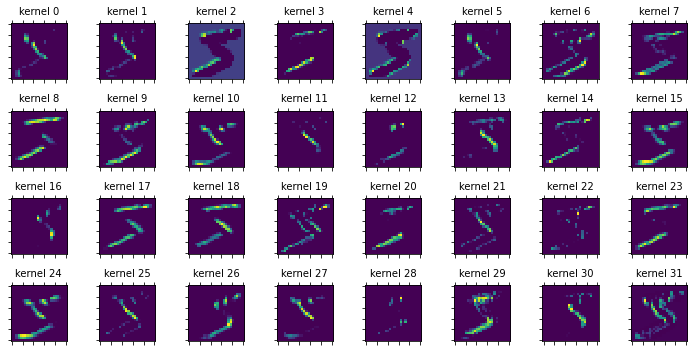

In [24]:
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

* 두번째 레이어는 최대 풀링 레이어

In [25]:
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


* 각 커널별로 출력되는 특성맵 이미지를 시각화
  * 최대 풀링은 인근 픽셀들을 모아서 최대값으록 고정하기 때문에 픽셀 수는 줄이면서 특징을 더욱 강하게 드러낼 수 있음

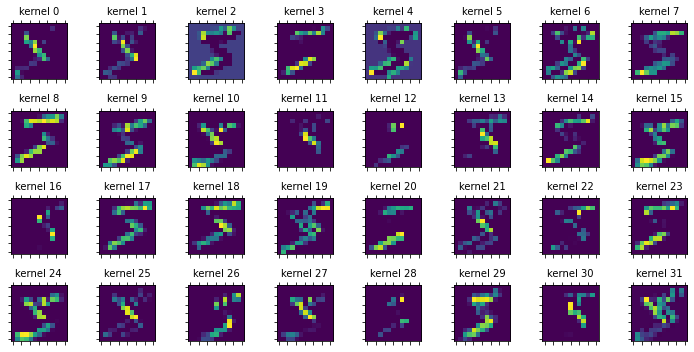

In [26]:
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

## **3. 복잡한 모델 생성**

* 텐서플로 케라스의 Functional API를 사용하면 복잡한 구조의 모델 구현 가능

### 1) 데이터셋 준비

In [27]:
import tensorflow as tf
import numpy as np

In [28]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


* 홀수/짝수 label 추가

In [29]:
y_train_odd = []
for y in y_train:
    if y % 2==0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [30]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [31]:
y_valid_odd = []
for y in y_valid:
    if y % 2==0:
        y_valid_odd.append(0)
    else:
        y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

* 색상 하나 -> 채널 1개

In [32]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### 2) Functional API로 다중 입력, 다중 출력 레이어 생성
  * 입력 레이어 inputs의 경우, Conv2D 레이어와 Flatten 레이어의 입력으로 사용됨 > 2개의 출력
  * 2개의 출력은 각각 다른 레이어의 입력으로 사용되고, 최종적으로 Concatenate 레이어에서 합쳐진 다음 Dense 레이어를 통과

In [33]:
inputs = tf.keras.layers.Input(shape=(28, 28, 1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten_1 (Flatten)            (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                            

* model과 layer에 name 속성을 따로 지정해주지 않으면 앞의 실행결과와 같이 model_1, input_2와 같이 정수형 인덱스를 사용하여 name 속성으로 자동 지정함

* 모델 구조 그리기

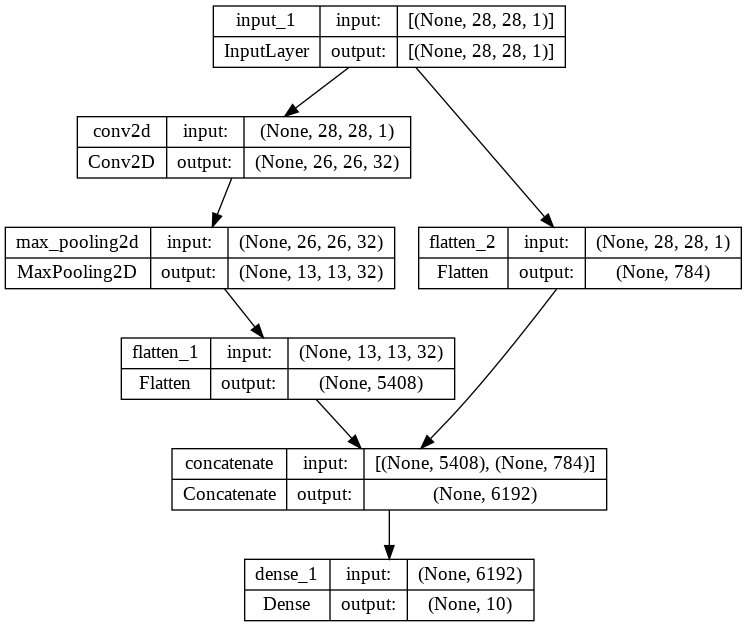

In [39]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

* 모델 컴파일, 훈련, 검증 데이터에 대한 모델의 예측 성능 평가

In [40]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2104 - accuracy: 0.9405 - val_loss: 0.0849 - val_accuracy: 0.9747
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0804 - accuracy: 0.9769 - val_loss: 0.0663 - val_accuracy: 0.9790
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0591 - accuracy: 0.9824 - val_loss: 0.0605 - val_accuracy: 0.9803
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0477 - accuracy: 0.9858 - val_loss: 0.0551 - val_accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0397 - accuracy: 0.9879 - val_loss: 0.0648 - val_accuracy: 0.9793
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0335 - accuracy: 0.9896 - val_loss: 0.0580 - val_accuracy: 0.9816
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0281 - accuracy: 0.9911 - val_loss: 0.0530 -

### 3) 다중 출력 분류 모델

* 0~9 숫자를 맞히는 분류 문제와 홀수,짝수를 맞히는 분류 문제를 동시에 풀어내는 모델

In [41]:
inputs = tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

* 모델의 입력 텐서와 출력 텐서를 화면에 표시

In [42]:
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


* 모델 구조 그리기

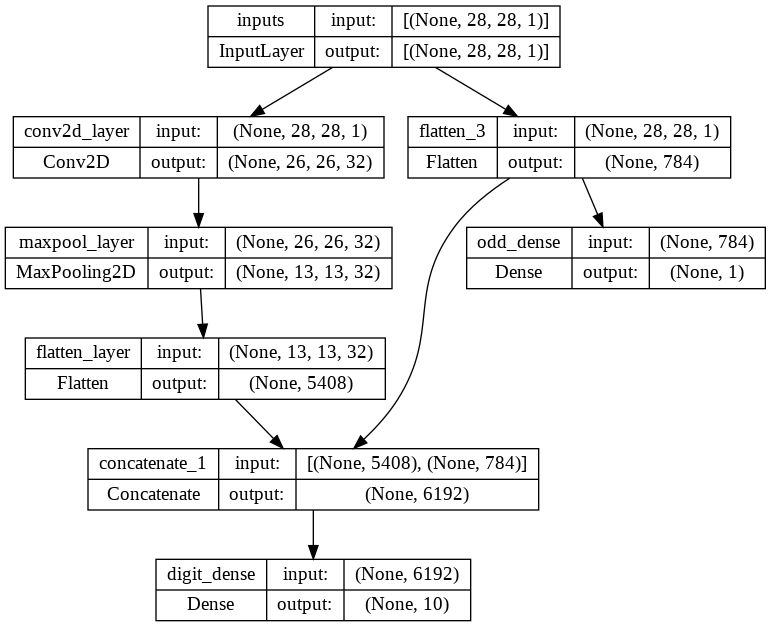

In [43]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

* 각각의 출력 Dense 레이어에 name 속성을 지정함 > 이름을 key로 하고 해당 key에 해당하는 레이어에 적용할 손실함수와 가중치를 딕셔너리 형태로 지정

* 모델을 훈련시키기 위해 fit() 메소드를 적용할 때도 출력 값을 2개 지정하고, 레이어 이름 속성을 key로 하는 딕셔너리 형태로 각각의 출력에 맞는 정답 배열을 입력해야 함 (검증 데이터셋도 마찬가지로 구분해서 지정)

In [44]:

# 모델 컴파일
model.compile(optimizer='adam', 
              loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense': 'binary_crossentropy'}, 
              loss_weights={'digit_dense': 1, 'odd_dense': 0.5}, # loss = 1.0 *sparse_categorical_crossentropy + 0.5*binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs': x_train_in}, {'digit_dense': y_train, 'odd_dense': y_train_odd}, 
                    validation_data=({'inputs': x_valid_in},  {'digit_dense': y_valid, 'odd_dense': y_valid_odd}), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3581 - digit_dense_loss: 0.1972 - odd_dense_loss: 0.3219 - digit_dense_accuracy: 0.9436 - odd_dense_accuracy: 0.8654 - val_loss: 0.2211 - val_digit_dense_loss: 0.0839 - val_odd_dense_loss: 0.2743 - val_digit_dense_accuracy: 0.9740 - val_odd_dense_accuracy: 0.8878
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2102 - digit_dense_loss: 0.0746 - odd_dense_loss: 0.2713 - digit_dense_accuracy: 0.9782 - odd_dense_accuracy: 0.8913 - val_loss: 0.1965 - val_digit_dense_loss: 0.0645 - val_odd_dense_loss: 0.2640 - val_digit_dense_accuracy: 0.9793 - val_odd_dense_accuracy: 0.8955
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1883 - digit_dense_loss: 0.0569 - odd_dense_loss: 0.2629 - digit_dense_accuracy: 0.9832 - odd_dense_accuracy: 0.8956 - val_loss: 0.1907 - val_digit_dense_loss: 0.0593 - val_odd_dense_loss: 0.2627 - val_digit_dense_accuracy: 0.9810 -

* 모델 성능 평가

In [45]:
model.evaluate({'inputs': x_valid_in}, {'digit_dense': y_valid, 'odd_dense': y_valid_odd})

313/313 [==============================] - 1s 4ms/step - loss: 0.1868 - digit_dense_loss: 0.0577 - odd_dense_loss: 0.2582 - digit_dense_accuracy: 0.9840 - odd_dense_accuracy: 0.9004


[0.18681606650352478,
 0.05773281678557396,
 0.25816649198532104,
 0.984000027179718,
 0.9003999829292297]

> 숫자 예측은 98% 정확도, 홀수 여부 판단은 90% 정확도

> 홀수 여부를 판단하는 분류기에 레이어를 더 추가해 예측 정확도를 높일 여지가 있음

* 첫번째 검증 데이터

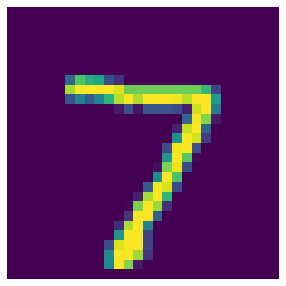

In [46]:
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx])
    plt.axis("off")
    plt.show()

plot_image(x_valid, 0)

* 검증 데이터셋의 모든 이미지 데이터 입력, 2가지 분류에 대한 예측 확률
  * 첫번째 예측값 : 10개 분류 레이블에 대한 확률
  * 두번째 예측값 : 홀수일 확률

In [47]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 1s 4ms/step
[1.6513716e-13 1.4581841e-09 9.3484298e-10 7.4083226e-07 7.6826748e-12
 1.9208795e-12 1.6058479e-21 9.9999923e-01 7.6828882e-10 2.3056625e-08]
[0.9994565]


In [48]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

* 임계값 0.5로 지정

In [49]:
odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

<ipython-input-49-cb61980817f6>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

### 4) 전이학습

* 전이학습 : 앞서 훈련한 모델의 일부를 가져와서 그대로 사용하고, 최종 출력층만 새롭게 추가하여 모델을 재구성 > 기존에 학습된 모델을 활용해 새로운 모델을 만들어 냄

* 앞서 학습한 모델에서 입력 레이어부터 'flatten_layer'라는 name 속성을 갖는 Flatten 층까지 해당하는 부분을 따로 추출하여 base_model 객체 만들기

In [50]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


* 모델 구조 시각화

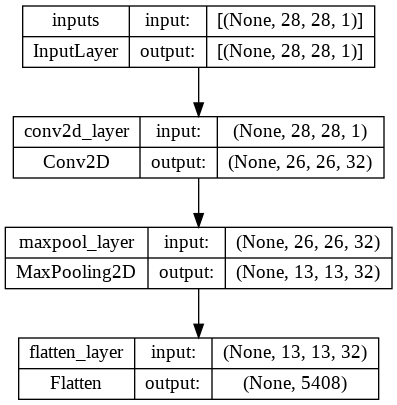

In [51]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

* Sequential API를 사용하여 앞에서 정의한 base_model을 레이어로 추가
* 최종 분류기 역할을 하는 Dense레이어를 새롭게 이어서 추가
  * 총 파라미터 54410개

In [52]:
# Sequential API 적용
digit_model = tf.keras.Sequential([
                                   base_model,
                                   tf.keras.layers.Dense(10, activation='softmax'),
                                   ])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


* 모델 구조 시각화

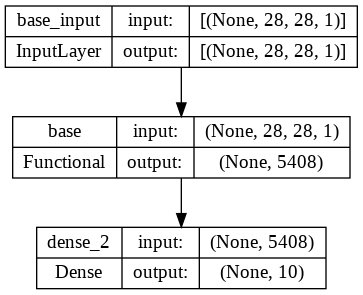

In [53]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

* 모델 컴파일 및 훈련

In [54]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1285 - accuracy: 0.9640 - val_loss: 0.0624 - val_accuracy: 0.9804
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0579 - accuracy: 0.9826 - val_loss: 0.0553 - val_accuracy: 0.9808
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0441 - accuracy: 0.9867 - val_loss: 0.0538 - val_accuracy: 0.9824
Epoch 4/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0361 - accuracy: 0.9887 - val_loss: 0.0501 - val_accuracy: 0.9846
Epoch 5/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0297 - accuracy: 0.9908 - val_loss: 0.0542 - val_accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0244 - accuracy: 0.9923 - val_loss: 0.0565 - val_accuracy: 0.9834
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0205 - accuracy: 0.9935 - val_loss: 0.0582 -

* 모델 인스턴스의 trainable을 False로 지정하면 모델의 파라미터 값이 고정되어 훈련을 통해 업데이트 되지 않음

In [55]:
base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


> 훈련 가능한 파라미터 개수가 0개로 확인됨

* 파라미터를 고정한 base_model_inpur 모델과 새로운 분류기 역할을 하는 Dense 레이어 Functional API를 적용하여 구성

In [56]:
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

> 총 파라미터 수는 54410개

> 고정한 320개의 파라미터는 훈련 불가능

> 훈련 가능한 파라미터 : Flatten 레이어의 출력 5408개와 Dense 레이어의 10개 노드 사이의 가중치

* 모델을 컴파일하고 훈련

In [57]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)
     

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1168 - accuracy: 0.9684 - val_loss: 0.0568 - val_accuracy: 0.9809
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0504 - accuracy: 0.9848 - val_loss: 0.0530 - val_accuracy: 0.9838
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0363 - accuracy: 0.9890 - val_loss: 0.0490 - val_accuracy: 0.9843
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0295 - accuracy: 0.9909 - val_loss: 0.0506 - val_accuracy: 0.9848
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0234 - accuracy: 0.9925 - val_loss: 0.0531 - val_accuracy: 0.9828
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0182 - accuracy: 0.9946 - val_loss: 0.0535 - val_accuracy: 0.9837
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0145 - accuracy: 0.9959 - val_loss: 0.0552 - val_accuracy:

* 특정 레이어를 지정하여 파라미터가 없데이트 되지 않도록 고정
  * Conv2D 레이어를 취소하고 trainable 속성을 False로 지정하는 예제

In [58]:
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


* 앞에서 고정한 모델에 새로운 분류기 역할을 하는 Dense 레이어를 연결하여 모델을 구성

In [59]:
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

* 모델을 컴파일하고 훈련

In [60]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1160 - accuracy: 0.9681 - val_loss: 0.0637 - val_accuracy: 0.9801
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0499 - accuracy: 0.9854 - val_loss: 0.0535 - val_accuracy: 0.9834
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0368 - accuracy: 0.9885 - val_loss: 0.0553 - val_accuracy: 0.9825
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0296 - accuracy: 0.9908 - val_loss: 0.0515 - val_accuracy: 0.9838
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0235 - accuracy: 0.9928 - val_loss: 0.0479 - val_accuracy: 0.9848
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0188 - accuracy: 0.9944 - val_loss: 0.0578 - val_accuracy: 0.9844
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0156 - accuracy: 0.9952 - val_loss: 0.0523 - val_accuracy